In [1]:
# convert given source yaml data to csv file
import yaml
import csv
import os
import pandas as pd
from pathlib import Path

def yaml_to_csv_recursive(base_input_dir, base_output_dir):
    base_input_path = Path(base_input_dir)
    base_output_path = Path(base_output_dir)
    
    base_output_path.mkdir(parents=True, exist_ok=True)
    
    for root, dirs, files in os.walk(base_input_path):
        current_path = Path(root)
        
        rel_path = current_path.relative_to(base_input_path)
        
        output_dir = base_output_path / rel_path
        output_dir.mkdir(parents=True, exist_ok=True)
        
        for file in files:
            if file.endswith(('.yml', '.yaml')):
                input_file = current_path / file
                output_file = output_dir / f"{file.rsplit('.', 1)[0]}.csv"
                
                try:
                    with open(input_file, 'r', encoding='utf-8') as yaml_file:
                        yaml_data = yaml.safe_load(yaml_file)
                    
                    if isinstance(yaml_data, list):
                        df = pd.DataFrame(yaml_data)
                    else:
                        df = pd.DataFrame([yaml_data])
                    
                   
                    df.to_csv(output_file, index=False)
                    print(f"Converted: {input_file} -> {output_file}")
                    
                except Exception as e:
                    print(f"Error processing {input_file}: {str(e)}")


input_directory = r"D:\Stock Project\data"  
output_directory = r"D:\Stock Project\data YAML to CSV"  
yaml_to_csv_recursive(input_directory, output_directory)


Converted: D:\Stock Project\data\2023-10\2023-10-03_05-30-00.yaml -> D:\Stock Project\data YAML to CSV\2023-10\2023-10-03_05-30-00.csv
Converted: D:\Stock Project\data\2023-10\2023-10-04_05-30-00.yaml -> D:\Stock Project\data YAML to CSV\2023-10\2023-10-04_05-30-00.csv
Converted: D:\Stock Project\data\2023-10\2023-10-05_05-30-00.yaml -> D:\Stock Project\data YAML to CSV\2023-10\2023-10-05_05-30-00.csv
Converted: D:\Stock Project\data\2023-10\2023-10-06_05-30-00.yaml -> D:\Stock Project\data YAML to CSV\2023-10\2023-10-06_05-30-00.csv
Converted: D:\Stock Project\data\2023-10\2023-10-09_05-30-00.yaml -> D:\Stock Project\data YAML to CSV\2023-10\2023-10-09_05-30-00.csv
Converted: D:\Stock Project\data\2023-10\2023-10-10_05-30-00.yaml -> D:\Stock Project\data YAML to CSV\2023-10\2023-10-10_05-30-00.csv
Converted: D:\Stock Project\data\2023-10\2023-10-11_05-30-00.yaml -> D:\Stock Project\data YAML to CSV\2023-10\2023-10-11_05-30-00.csv
Converted: D:\Stock Project\data\2023-10\2023-10-12_05-

In [4]:
# seperate csv files based on company name
import pandas as pd
import os
from pathlib import Path
import glob

def split_by_ticker(input_directory, output_directory):
    
    output_path = Path(output_directory)
    output_path.mkdir(parents=True, exist_ok=True)

    csv_files = glob.glob(str(Path(input_directory) / "**" / "*.csv"), recursive=True)
    
    print("Reading CSV files...")
    all_data = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            all_data.append(df)
            print(f"Read: {file}")
        except Exception as e:
            print(f"Error reading {file}: {str(e)}")

    print("\nCombining data...")
    combined_df = pd.concat(all_data, ignore_index=True)

    tickers = combined_df['Ticker'].unique()
    print(f"\nFound {len(tickers)} unique tickers")

    print("\nSplitting and saving files...")
    for ticker in tickers:
        ticker_data = combined_df[combined_df['Ticker'] == ticker]

        filename = f"{ticker}.csv"
        output_file = output_path / filename

        ticker_data.to_csv(output_file, index=False)
        print(f"Saved {filename} with {len(ticker_data)} rows")

    print("\nProcessing complete!")
    print(f"Total number of tickers processed: {len(tickers)}")

input_directory = r"D:\Stock Project\data YAML to CSV"
output_directory = r"D:\Stock Project\split_by_ticker"

split_by_ticker(input_directory, output_directory)


Reading CSV files...
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-03_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-04_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-05_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-06_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-09_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-10_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-11_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-12_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-13_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-16_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-17_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-18_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\2023-10\2023-10-19_05-30-00.csv
Read: D:\Stock Project\data YAML to CSV\202

Found 50 CSV files
Analyzing period: November 2023 - November 2024

Processing files...
Processed ADANIENT with 264 trading days
Processed ADANIPORTS with 264 trading days
Processed APOLLOHOSP with 264 trading days
Processed ASIANPAINT with 264 trading days
Processed AXISBANK with 264 trading days
Processed BAJAJ-AUTO with 264 trading days
Processed BAJAJFINSV with 264 trading days
Processed BAJFINANCE with 264 trading days
Processed BEL with 264 trading days
Processed BHARTIARTL with 264 trading days
Processed BPCL with 264 trading days
Processed BRITANNIA with 264 trading days
Processed CIPLA with 264 trading days
Processed COALINDIA with 264 trading days
Processed DRREDDY with 264 trading days
Processed EICHERMOT with 264 trading days
Processed GRASIM with 264 trading days
Processed HCLTECH with 264 trading days
Processed HDFCBANK with 264 trading days
Processed HDFCLIFE with 264 trading days
Processed HEROMOTOCO with 264 trading days
Processed HINDALCO with 264 trading days
Process

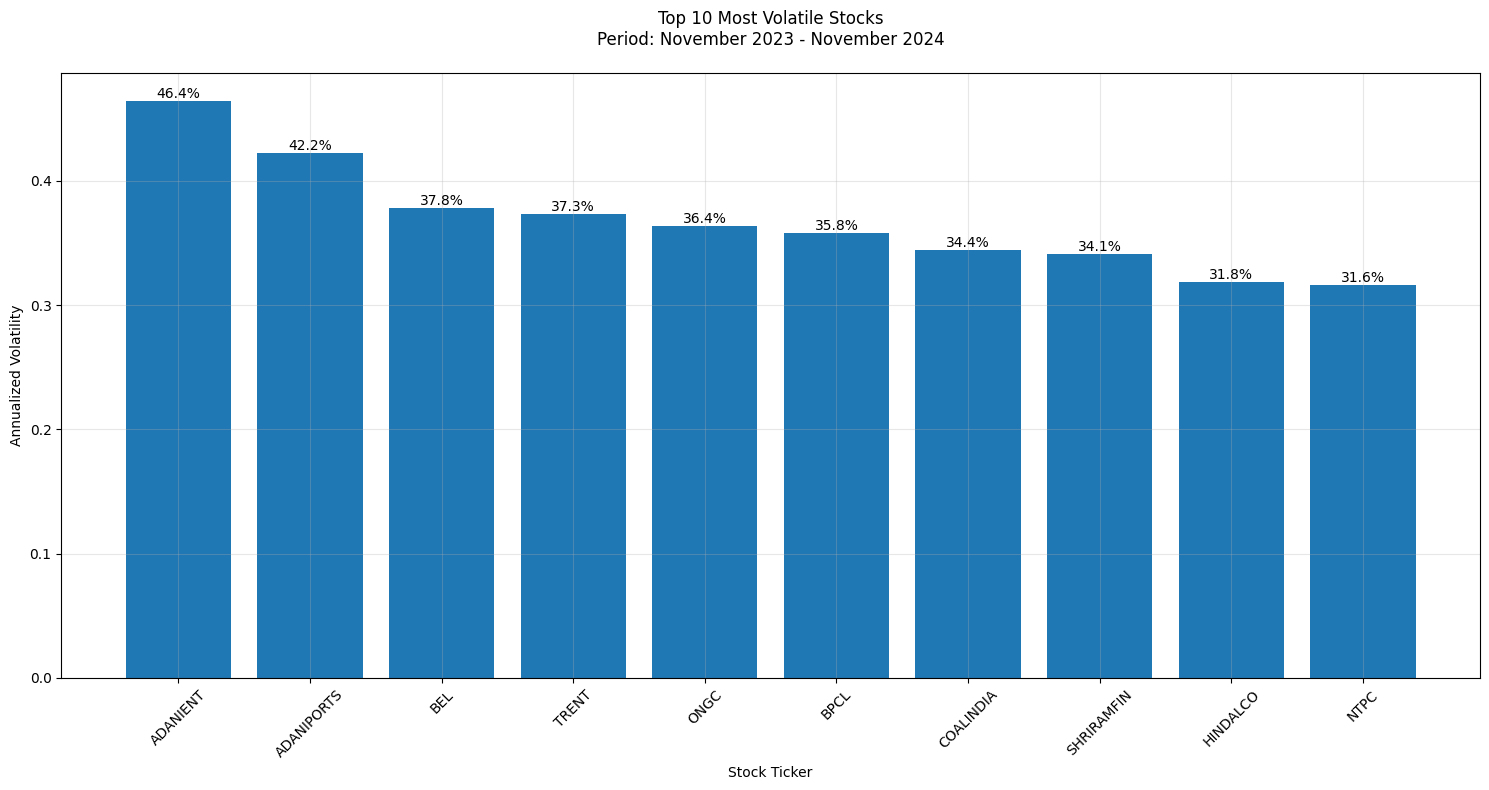

In [2]:
#Top 10 Most Volatile Stocks from November 2023 - November 2024
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from datetime import datetime, timedelta

def calculate_volatility(input_directory, output_directory):
    output_path = Path(output_directory)
    output_path.mkdir(parents=True, exist_ok=True)

    start_date = datetime(2023, 11, 1)     
    end_date = datetime(2024, 11, 30)      

    csv_files = glob.glob(str(Path(input_directory) / "*.csv"))
    print(f"Found {len(csv_files)} CSV files")
    print(f"Analyzing period: {start_date.strftime('%B %Y')} - {end_date.strftime('%B %Y')}")

    volatility_results = []
    
    print("\nProcessing files...")
    for file in csv_files:
        try:
            df = pd.read_csv(file)

            df['date'] = pd.to_datetime(df['date'])

            mask = (df['date'] >= start_date) & (df['date'] <= end_date)
            df = df[mask]

            if len(df) < 20: 
                print(f"Skipping {Path(file).stem} - insufficient data points")
                continue

            df = df.sort_values('date')

            daily_returns = (df['close'] - df['close'].shift(1)) / df['close'].shift(1)

            std_dev = daily_returns.std()

            annualized_vol = std_dev * (252 ** 0.5) 

            ticker = df['Ticker'].iloc[0]
            
            volatility_results.append({
                'Ticker': ticker,
                'Daily_StdDev': std_dev,  
                'Annualized_Volatility': annualized_vol,  
                'Data_Points': len(df),
                'Avg_Daily_Return': daily_returns.mean(),
                'Max_Daily_Return': daily_returns.max(),
                'Min_Daily_Return': daily_returns.min(),
                'First_Date': df['date'].min().strftime('%Y-%m-%d'),
                'Last_Date': df['date'].max().strftime('%Y-%m-%d'),
                'Start_Price': df['close'].iloc[0],
                'End_Price': df['close'].iloc[-1]
            })
            
            print(f"Processed {ticker} with {len(df)} trading days")
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    volatility_df = pd.DataFrame(volatility_results)

    top_10_volatile = volatility_df.nlargest(10, 'Annualized_Volatility')

    plt.figure(figsize=(15, 8))
    bars = plt.bar(top_10_volatile['Ticker'], top_10_volatile['Annualized_Volatility'])
    
    plt.title('Top 10 Most Volatile Stocks\n'
              f'Period: November 2023 - November 2024', pad=20)
    plt.xlabel('Stock Ticker')
    plt.ylabel('Annualized Volatility')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}',
                ha='center', va='bottom')
    
    plt.tight_layout()

    plt.savefig(output_path / 'top_10_volatility.png', dpi=300, bbox_inches='tight')
    print("\nVisualization saved as 'top_10_volatility.png'")

    csv_df = volatility_df.copy()
    for col in ['Daily_StdDev', 'Annualized_Volatility', 'Avg_Daily_Return', 'Max_Daily_Return', 'Min_Daily_Return']:
        csv_df[col] = csv_df[col].map('{:.6f}'.format)

    csv_df.sort_values('Annualized_Volatility', ascending=False).to_csv(
        output_path / 'volatility_analysis.csv', index=False
    )
    print("Complete volatility data saved as 'volatility_analysis.csv'")

    print("\nVolatility Analysis Summary (November 2023 - November 2024):")
    print("\nTop 10 Most Volatile Stocks:")
    print("=" * 80)
    for _, row in top_10_volatile.iterrows():
        print(f"Ticker: {row['Ticker']}")
        print(f"Daily Standard Deviation: {row['Daily_StdDev']:.2%}")
        print(f"Annualized Volatility: {row['Annualized_Volatility']:.2%}")
        print(f"Average Daily Return: {row['Avg_Daily_Return']:.2%}")
        print(f"Maximum Daily Return: {row['Max_Daily_Return']:.2%}")
        print(f"Minimum Daily Return: {row['Min_Daily_Return']:.2%}")
        print(f"Trading Days: {row['Data_Points']}")
        print(f"Date Range: {row['First_Date']} to {row['Last_Date']}")
        print(f"Price Range: {row['Start_Price']:.2f} to {row['End_Price']:.2f}")
        print("-" * 80)
    
    print("\nOverall Market Statistics:")
    print(f"Average Daily StdDev: {volatility_df['Daily_StdDev'].mean():.2%}")
    print(f"Average Annualized Volatility: {volatility_df['Annualized_Volatility'].mean():.2%}")
    print(f"Most Volatile Stock: {volatility_df.iloc[0]['Ticker']} ({volatility_df['Annualized_Volatility'].max():.2%})")
    print(f"Least Volatile Stock: {volatility_df.iloc[-1]['Ticker']} ({volatility_df['Annualized_Volatility'].min():.2%})")
    print(f"Average Trading Days: {volatility_df['Data_Points'].mean():.0f}")
    
    return volatility_df

input_directory = r"D:\Stock Project\split_by_ticker"
output_directory = r"D:\Stock Project\volatility_analysis"

volatility_results = calculate_volatility(input_directory, output_directory)


Found 50 CSV files
Analyzing period: November 2023 - November 2024

Processing files...
Processed ADANIENT with 264 trading days
Processed ADANIPORTS with 264 trading days
Processed APOLLOHOSP with 264 trading days
Processed ASIANPAINT with 264 trading days
Processed AXISBANK with 264 trading days
Processed BAJAJ-AUTO with 264 trading days
Processed BAJAJFINSV with 264 trading days
Processed BAJFINANCE with 264 trading days
Processed BEL with 264 trading days
Processed BHARTIARTL with 264 trading days
Processed BPCL with 264 trading days
Processed BRITANNIA with 264 trading days
Processed CIPLA with 264 trading days
Processed COALINDIA with 264 trading days
Processed DRREDDY with 264 trading days
Processed EICHERMOT with 264 trading days
Processed GRASIM with 264 trading days
Processed HCLTECH with 264 trading days
Processed HDFCBANK with 264 trading days
Processed HDFCLIFE with 264 trading days
Processed HEROMOTOCO with 264 trading days
Processed HINDALCO with 264 trading days
Process

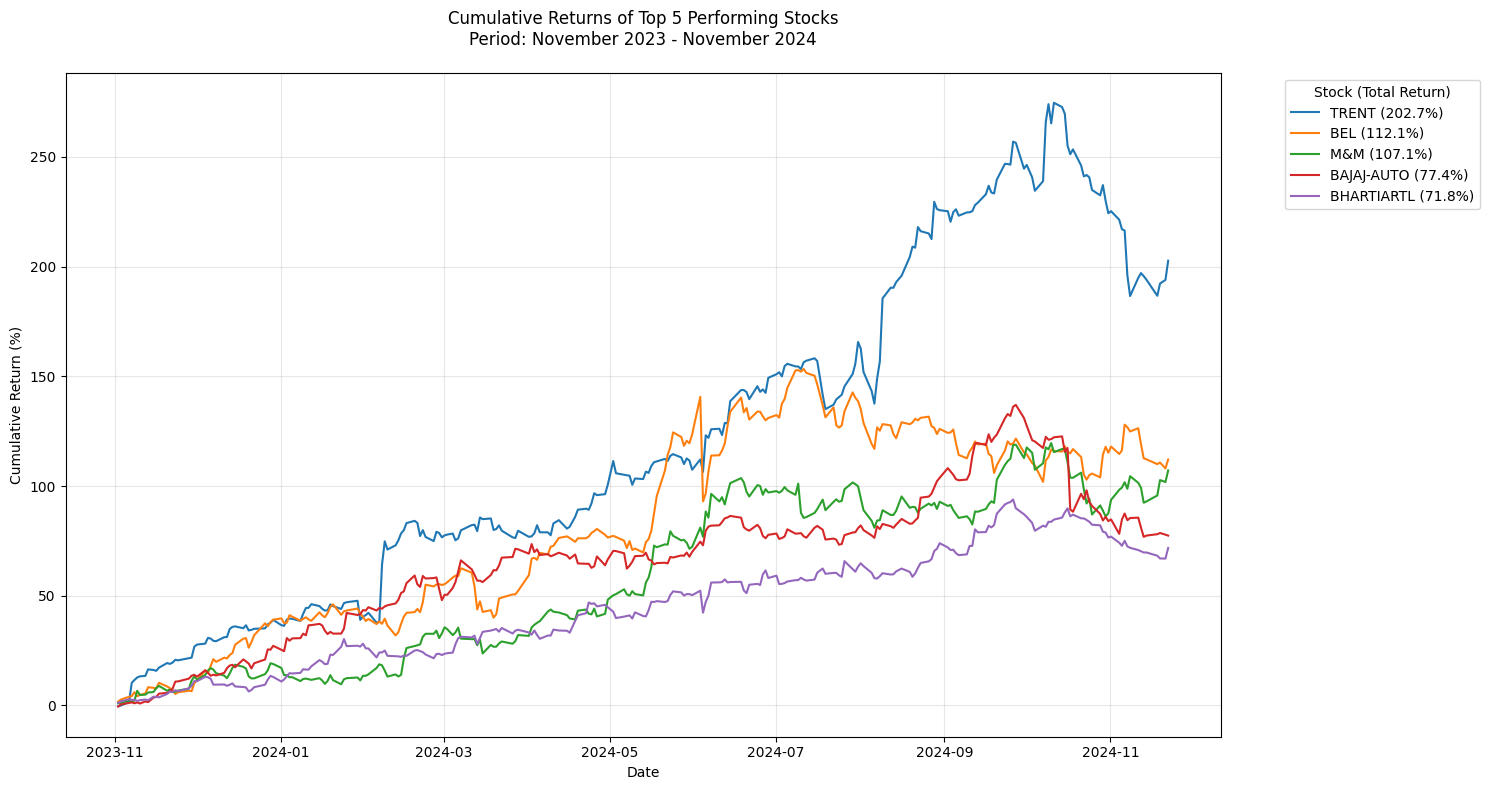

In [3]:
#Cumulative Returns of Top 5 Performing Stocks from November 2023 - November 2024
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from datetime import datetime, timedelta

def analyze_cumulative_returns(input_directory, output_directory):
    output_path = Path(output_directory)
    output_path.mkdir(parents=True, exist_ok=True)
    
    start_date = datetime(2023, 11, 1)     
    end_date = datetime(2024, 11, 30)      

    csv_files = glob.glob(str(Path(input_directory) / "*.csv"))
    print(f"Found {len(csv_files)} CSV files")
    print(f"Analyzing period: {start_date.strftime('%B %Y')} - {end_date.strftime('%B %Y')}")

    stock_returns = {}
    cumulative_returns = []
    
    print("\nProcessing files...")
    for file in csv_files:
        try:
            df = pd.read_csv(file)

            df['date'] = pd.to_datetime(df['date'])

            mask = (df['date'] >= start_date) & (df['date'] <= end_date)
            df = df[mask]

            if len(df) < 20:  
                print(f"Skipping {Path(file).stem} - insufficient data points")
                continue

            df = df.sort_values('date')

            df['daily_return'] = df['close'].pct_change()

            df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1

            ticker = df['Ticker'].iloc[0]

            stock_returns[ticker] = df[['date', 'cumulative_return']].copy()

            final_return = df['cumulative_return'].iloc[-1]
            cumulative_returns.append({
                'Ticker': ticker,
                'Cumulative_Return': final_return,
                'Start_Price': df['close'].iloc[0],
                'End_Price': df['close'].iloc[-1],
                'Trading_Days': len(df)
            })
            
            print(f"Processed {ticker} with {len(df)} trading days")
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    returns_df = pd.DataFrame(cumulative_returns)
    top_5_performers = returns_df.nlargest(5, 'Cumulative_Return')

    plt.figure(figsize=(15, 8))

    for _, row in top_5_performers.iterrows():
        ticker = row['Ticker']
        data = stock_returns[ticker]
        plt.plot(data['date'], data['cumulative_return'] * 100, label=f"{ticker} ({row['Cumulative_Return']:.1%})")
    
    plt.title('Cumulative Returns of Top 5 Performing Stocks\n'
              f'Period: November 2023 - November 2024', pad=20)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Stock (Total Return)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.savefig(output_path / 'top_5_cumulative_returns.png', dpi=300, bbox_inches='tight')
    print("\nVisualization saved as 'top_5_cumulative_returns.png'")

    returns_df.sort_values('Cumulative_Return', ascending=False).to_csv(
        output_path / 'cumulative_returns_analysis.csv', index=False
    )
    print("Complete returns data saved as 'cumulative_returns_analysis.csv'")

    print("\nTop 5 Performing Stocks:")
    print("=" * 80)
    for _, row in top_5_performers.iterrows():
        print(f"Ticker: {row['Ticker']}")
        print(f"Cumulative Return: {row['Cumulative_Return']:.2%}")
        print(f"Start Price: {row['Start_Price']:.2f}")
        print(f"End Price: {row['End_Price']:.2f}")
        print(f"Trading Days: {row['Trading_Days']}")
        print("-" * 80)
    
    print("\nOverall Market Statistics:")
    print(f"Average Return: {returns_df['Cumulative_Return'].mean():.2%}")
    print(f"Median Return: {returns_df['Cumulative_Return'].median():.2%}")
    print(f"Best Performer: {returns_df.iloc[0]['Ticker']} ({returns_df['Cumulative_Return'].max():.2%})")
    print(f"Worst Performer: {returns_df.iloc[-1]['Ticker']} ({returns_df['Cumulative_Return'].min():.2%})")
    
    return returns_df

input_directory = r"D:\Stock Project\split_by_ticker"
output_directory = r"D:\Stock Project\returns_analysis"

returns_results = analyze_cumulative_returns(input_directory, output_directory)


Analyzing period: November 2023 - November 2024
Processed ADANIENT (Infrastructure)
Processed ADANIPORTS (Infrastructure)
Processed APOLLOHOSP (Healthcare)
Processed ASIANPAINT (Consumer Goods)
Processed AXISBANK (Banking)
Processed BAJAJ-AUTO (Automobile)
Processed BAJAJFINSV (Financial Services)
Processed BAJFINANCE (Financial Services)
Processed BEL (Defense)
Processed BHARTIARTL (Telecom)
Processed BPCL (Oil & Gas)
Processed BRITANNIA (FMCG)
Processed CIPLA (Healthcare)
Processed COALINDIA (Mining)
Processed DRREDDY (Healthcare)
Processed EICHERMOT (Automobile)
Processed GRASIM (Cement)
Processed HCLTECH (IT)
Processed HDFCBANK (Banking)
Processed HDFCLIFE (Insurance)
Processed HEROMOTOCO (Automobile)
Processed HINDALCO (Metal)
Processed HINDUNILVR (FMCG)
Processed ICICIBANK (Banking)
Processed INDUSINDBK (Banking)
Processed INFY (IT)
Processed ITC (FMCG)
Processed JSWSTEEL (Metal)
Processed KOTAKBANK (Banking)
Processed LT (Infrastructure)
Processed M&M (Automobile)
Processed MARU

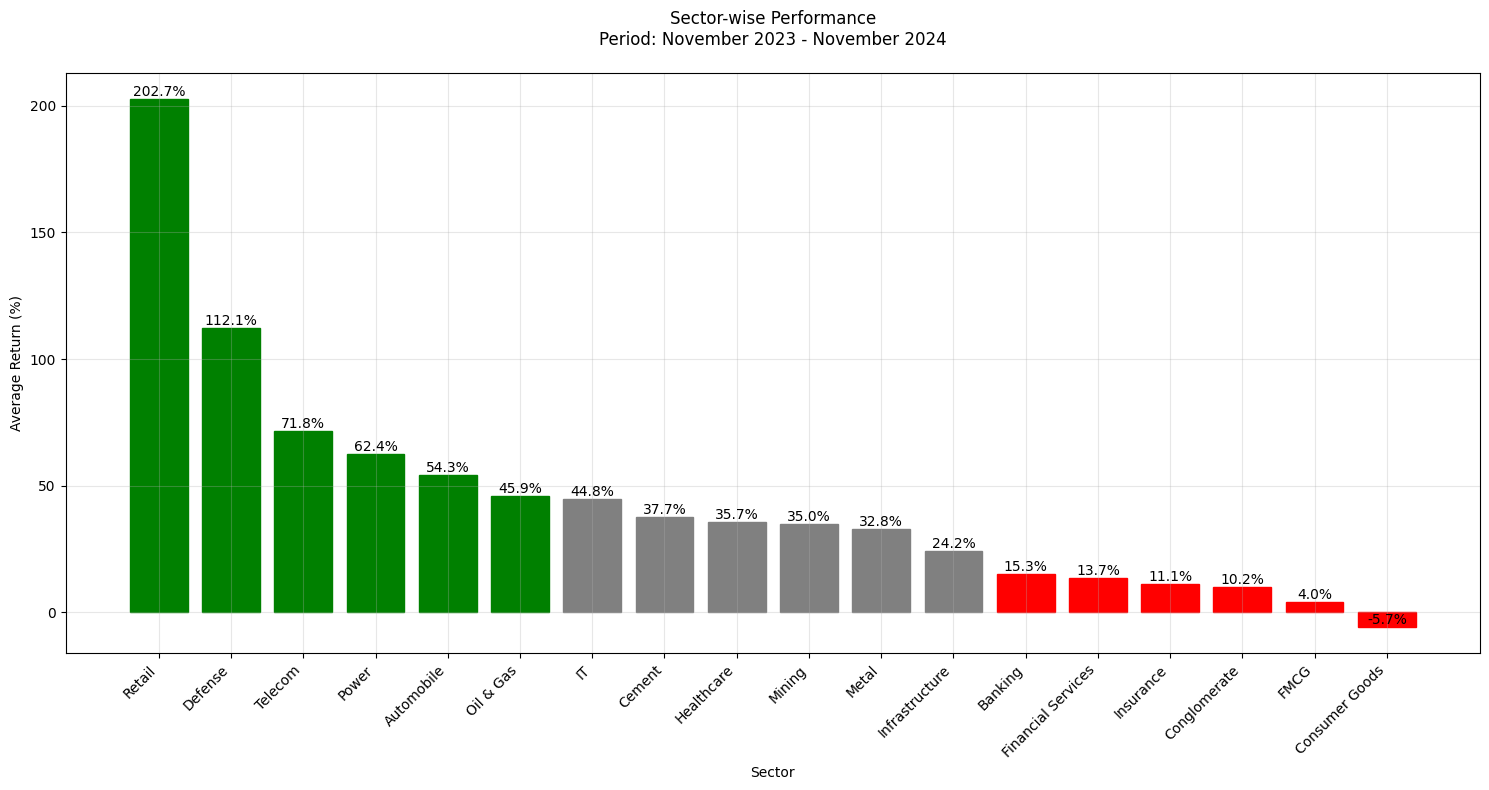

In [4]:
#Sector-wise Performance from November 2023 - November 2024
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from datetime import datetime, timedelta

def analyze_sector_performance(input_directory, output_directory):
    output_path = Path(output_directory)
    output_path.mkdir(parents=True, exist_ok=True)

    start_date = datetime(2023, 11, 1)
    end_date = datetime(2024, 11, 30)

    sector_mapping = {
        'ADANIENT': 'Infrastructure',
        'ADANIPORTS': 'Infrastructure',
        'APOLLOHOSP': 'Healthcare',
        'ASIANPAINT': 'Consumer Goods',
        'AXISBANK': 'Banking',
        'BAJAJ-AUTO': 'Automobile',
        'BAJAJFINSV': 'Financial Services',
        'BAJFINANCE': 'Financial Services',
        'BEL': 'Defense',
        'BHARTIARTL': 'Telecom',
        'BPCL': 'Oil & Gas',
        'BRITANNIA': 'FMCG',
        'CIPLA': 'Healthcare',
        'COALINDIA': 'Mining',
        'DRREDDY': 'Healthcare',
        'EICHERMOT': 'Automobile',
        'GRASIM': 'Cement',
        'HCLTECH': 'IT',
        'HDFCBANK': 'Banking',
        'HDFCLIFE': 'Insurance',
        'HEROMOTOCO': 'Automobile',
        'HINDALCO': 'Metal',
        'HINDUNILVR': 'FMCG',
        'ICICIBANK': 'Banking',
        'INDUSINDBK': 'Banking',
        'INFY': 'IT',
        'ITC': 'FMCG',
        'JSWSTEEL': 'Metal',
        'KOTAKBANK': 'Banking',
        'LT': 'Infrastructure',
        'M&M': 'Automobile',
        'MARUTI': 'Automobile',
        'NESTLEIND': 'FMCG',
        'NTPC': 'Power',
        'ONGC': 'Oil & Gas',
        'POWERGRID': 'Power',
        'RELIANCE': 'Conglomerate',
        'SBILIFE': 'Insurance',
        'SBIN': 'Banking',
        'SHRIRAMFIN': 'Financial Services',
        'SUNPHARMA': 'Healthcare',
        'TATACONSUM': 'FMCG',
        'TATAMOTORS': 'Automobile',
        'TATASTEEL': 'Metal',
        'TCS': 'IT',
        'TECHM': 'IT',
        'TITAN': 'Consumer Goods',
        'TRENT': 'Retail',
        'ULTRACEMCO': 'Cement',
        'WIPRO': 'IT'
    }

    sector_data = {}
    
    print(f"Analyzing period: {start_date.strftime('%B %Y')} - {end_date.strftime('%B %Y')}")

    for file in glob.glob(str(Path(input_directory) / "*.csv")):
        try:
            df = pd.read_csv(file)
            ticker = df['Ticker'].iloc[0]

            if ticker not in sector_mapping:
                print(f"Warning: No sector mapping for {ticker}")
                continue
                
            sector = sector_mapping[ticker]

            df['date'] = pd.to_datetime(df['date'])
            df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
            
            if len(df) < 20: 
                continue

            df = df.sort_values('date')
            total_return = (df['close'].iloc[-1] - df['close'].iloc[0]) / df['close'].iloc[0]

            if sector not in sector_data:
                sector_data[sector] = []
            sector_data[sector].append({
                'Ticker': ticker,
                'Return': total_return,
                'Start_Price': df['close'].iloc[0],
                'End_Price': df['close'].iloc[-1],
                'Trading_Days': len(df)
            })
            
            print(f"Processed {ticker} ({sector})")
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    sector_performance = []
    sector_details = {}
    
    for sector, stocks in sector_data.items():
        avg_return = sum(stock['Return'] for stock in stocks) / len(stocks)
        sector_performance.append({
            'Sector': sector,
            'Average_Return': avg_return,
            'Number_of_Stocks': len(stocks)
        })

        sector_details[sector] = sorted(stocks, key=lambda x: x['Return'], reverse=True)

    sector_df = pd.DataFrame(sector_performance)
    sector_df = sector_df.sort_values('Average_Return', ascending=False)

    num_sectors = len(sector_df)
    top_n = max(1, num_sectors // 3)
    
    best_sectors = sector_df.head(top_n)
    worst_sectors = sector_df.tail(top_n)
    normal_sectors = sector_df.iloc[top_n:-top_n] if num_sectors > 2*top_n else pd.DataFrame()

    plt.figure(figsize=(15, 8))

    bars = plt.bar(sector_df['Sector'], sector_df['Average_Return'] * 100)

    for i, bar in enumerate(bars):
        if i < top_n:
            bar.set_color('green')
        elif i >= len(bars) - top_n:
            bar.set_color('red')
        else:
            bar.set_color('gray')
    
    plt.title('Sector-wise Performance\n'
              f'Period: November 2023 - November 2024', pad=20)
    plt.xlabel('Sector')
    plt.ylabel('Average Return (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')
    
    plt.tight_layout()

    plt.savefig(output_path / 'sector_performance.png', dpi=300, bbox_inches='tight')
    print("\nVisualization saved as 'sector_performance.png'")

    sector_df.to_csv(output_path / 'sector_performance.csv', index=False)

    with open(output_path / 'detailed_sector_analysis.txt', 'w') as f:
        f.write("Detailed Sector Analysis\n")
        f.write(f"Period: {start_date.strftime('%B %Y')} - {end_date.strftime('%B %Y')}\n\n")
        
        for sector in sector_df['Sector']:
            f.write(f"\n{sector}\n")
            f.write("=" * 50 + "\n")
            for stock in sector_details[sector]:
                f.write(f"Ticker: {stock['Ticker']}\n")
                f.write(f"Return: {stock['Return']:.2%}\n")
                f.write(f"Start Price: {stock['Start_Price']:.2f}\n")
                f.write(f"End Price: {stock['End_Price']:.2f}\n")
                f.write(f"Trading Days: {stock['Trading_Days']}\n")
                f.write("-" * 30 + "\n")
    
    print("Detailed sector analysis saved as 'detailed_sector_analysis.txt'")

    print("\nSector Performance Summary:")
    print("\nBest Performing Sectors:")
    print("=" * 80)
    for _, row in best_sectors.iterrows():
        print(f"Sector: {row['Sector']}")
        print(f"Average Return: {row['Average_Return']:.2%}")
        print(f"Number of Stocks: {row['Number_of_Stocks']}")
        print("-" * 80)
    
    if not normal_sectors.empty:
        print("\nNormal Performing Sectors:")
        print("=" * 80)
        for _, row in normal_sectors.iterrows():
            print(f"Sector: {row['Sector']}")
            print(f"Average Return: {row['Average_Return']:.2%}")
            print(f"Number of Stocks: {row['Number_of_Stocks']}")
            print("-" * 80)
    
    print("\nWorst Performing Sectors:")
    print("=" * 80)
    for _, row in worst_sectors.iterrows():
        print(f"Sector: {row['Sector']}")
        print(f"Average Return: {row['Average_Return']:.2%}")
        print(f"Number of Stocks: {row['Number_of_Stocks']}")
        print("-" * 80)
    
    return sector_df

input_directory = r"D:\Stock Project\split_by_ticker"
output_directory = r"D:\Stock Project\sector_analysis"

sector_results = analyze_sector_performance(input_directory, output_directory)


Analyzing correlations for period: November 2023 - November 2024

Processing stock data...
Processed ADANIENT
Processed ADANIPORTS
Processed APOLLOHOSP
Processed ASIANPAINT
Processed AXISBANK
Processed BAJAJ-AUTO
Processed BAJAJFINSV
Processed BAJFINANCE
Processed BEL
Processed BHARTIARTL
Processed BPCL
Processed BRITANNIA
Processed CIPLA
Processed COALINDIA
Processed DRREDDY
Processed EICHERMOT
Processed GRASIM
Processed HCLTECH
Processed HDFCBANK
Processed HDFCLIFE
Processed HEROMOTOCO
Processed HINDALCO
Processed HINDUNILVR
Processed ICICIBANK
Processed INDUSINDBK
Processed INFY
Processed ITC
Processed JSWSTEEL
Processed KOTAKBANK
Processed LT
Processed M&M
Processed MARUTI
Processed NESTLEIND
Processed NTPC
Processed ONGC
Processed POWERGRID
Processed RELIANCE
Processed SBILIFE
Processed SBIN
Processed SHRIRAMFIN
Processed SUNPHARMA
Processed TATACONSUM
Processed TATAMOTORS
Processed TATASTEEL
Processed TCS
Processed TECHM
Processed TITAN
Processed TRENT
Processed ULTRACEMCO
Proces

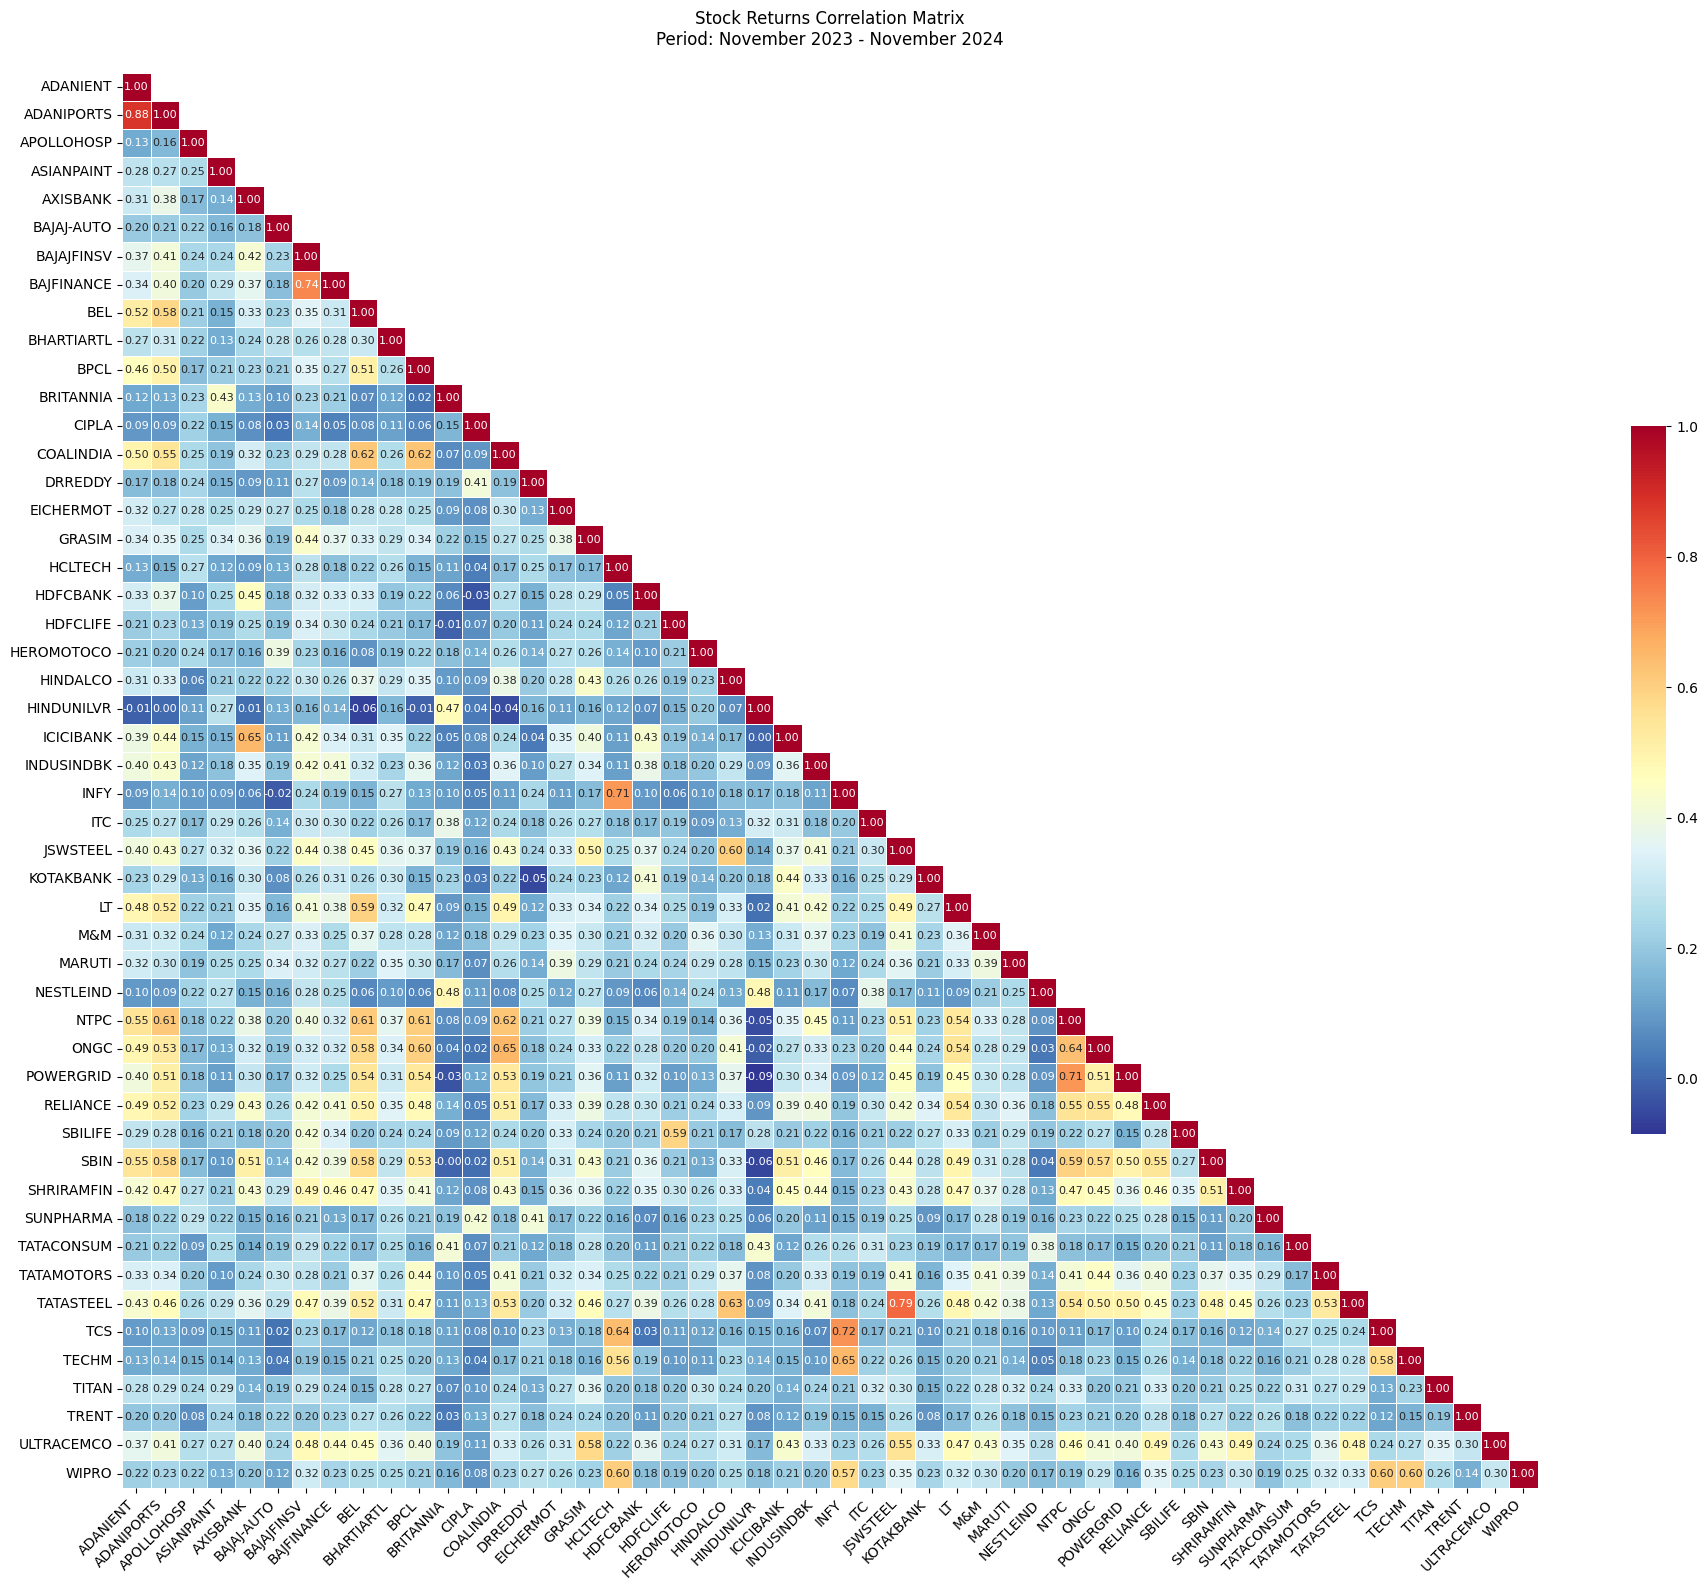

In [5]:
#Stock Returns Correlation Matrix from November 2023 - November 2024
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from datetime import datetime
import numpy as np

def analyze_stock_correlations(input_directory, output_directory):
    output_path = Path(output_directory)
    output_path.mkdir(parents=True, exist_ok=True)

    start_date = datetime(2023, 11, 1)
    end_date = datetime(2024, 11, 30)
    
    print(f"Analyzing correlations for period: {start_date.strftime('%B %Y')} - {end_date.strftime('%B %Y')}")

    stock_returns = {}

    print("\nProcessing stock data...")
    for file in glob.glob(str(Path(input_directory) / "*.csv")):
        try:
            df = pd.read_csv(file)
            ticker = df['Ticker'].iloc[0]

            df['date'] = pd.to_datetime(df['date'])
            df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
            
            if len(df) < 20:  
                continue

            df = df.sort_values('date')
            df['return'] = df['close'].pct_change()

            stock_returns[ticker] = pd.Series(df['return'].values, index=df['date'])
            
            print(f"Processed {ticker}")
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    returns_df = pd.DataFrame(stock_returns)

    correlation_matrix = returns_df.corr()

    plt.figure(figsize=(20, 16))

    mask = np.triu(np.ones_like(correlation_matrix), k=1)

    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True,  
                fmt='.2f',   
                cmap='RdYlBu_r',  
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": .5},
                annot_kws={"size": 8})
    
    plt.title('Stock Returns Correlation Matrix\n'
              f'Period: November 2023 - November 2024', pad=20)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()

    plt.savefig(output_path / 'correlation_heatmap.png', dpi=300, bbox_inches='tight')
    print("\nCorrelation heatmap saved as 'correlation_heatmap.png'")

    correlation_matrix.to_csv(output_path / 'correlation_matrix.csv')
    print("Correlation matrix saved as 'correlation_matrix.csv'")

    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    highest_corr = upper_triangle.unstack()
    highest_corr = highest_corr.sort_values(ascending=False)
    highest_corr = highest_corr[highest_corr != 1.0]  
    highest_corr = highest_corr[~np.isnan(highest_corr)]  

    with open(output_path / 'correlation_analysis.txt', 'w') as f:
        f.write("Stock Correlation Analysis\n")
        f.write(f"Period: {start_date.strftime('%B %Y')} - {end_date.strftime('%B %Y')}\n\n")
        
        f.write("Top 10 Highest Correlations:\n")
        f.write("=" * 50 + "\n")
        for idx, corr in highest_corr.head(10).items():
            f.write(f"{idx[0]} - {idx[1]}: {corr:.3f}\n")
        
        f.write("\nTop 10 Lowest Correlations:\n")
        f.write("=" * 50 + "\n")
        for idx, corr in highest_corr.tail(10).items():
            f.write(f"{idx[0]} - {idx[1]}: {corr:.3f}\n")

        avg_corr = correlation_matrix.mean()
        f.write("\nAverage Correlation by Stock:\n")
        f.write("=" * 50 + "\n")
        for ticker, avg in avg_corr.sort_values(ascending=False).items():
            f.write(f"{ticker}: {avg:.3f}\n")
    
    print("Detailed correlation analysis saved as 'correlation_analysis.txt'")

    print("\nCorrelation Summary:")
    print("\nTop 5 Highest Correlated Pairs:")
    for idx, corr in highest_corr.head().items():
        print(f"{idx[0]} - {idx[1]}: {corr:.3f}")
    
    print("\nTop 5 Lowest Correlated Pairs:")
    for idx, corr in highest_corr.tail().items():
        print(f"{idx[0]} - {idx[1]}: {corr:.3f}")
    
    print("\nStocks with Highest Average Correlation:")
    for ticker, avg in avg_corr.nlargest(5).items():
        print(f"{ticker}: {avg:.3f}")
    
    return correlation_matrix

input_directory = r"D:\Stock Project\split_by_ticker"
output_directory = r"D:\Stock Project\correlation_analysis"

correlation_results = analyze_stock_correlations(input_directory, output_directory)


Analyzing period: November 2023 - November 2024
Processed ADANIENT
Processed ADANIPORTS
Processed APOLLOHOSP
Processed ASIANPAINT
Processed AXISBANK
Processed BAJAJ-AUTO
Processed BAJAJFINSV
Processed BAJFINANCE
Processed BEL
Processed BHARTIARTL
Processed BPCL
Processed BRITANNIA
Processed CIPLA
Processed COALINDIA
Processed DRREDDY
Processed EICHERMOT
Processed GRASIM
Processed HCLTECH
Processed HDFCBANK
Processed HDFCLIFE
Processed HEROMOTOCO
Processed HINDALCO
Processed HINDUNILVR
Processed ICICIBANK
Processed INDUSINDBK
Processed INFY
Processed ITC
Processed JSWSTEEL
Processed KOTAKBANK
Processed LT
Processed M&M
Processed MARUTI
Processed NESTLEIND
Processed NTPC
Processed ONGC
Processed POWERGRID
Processed RELIANCE
Processed SBILIFE
Processed SBIN
Processed SHRIRAMFIN
Processed SUNPHARMA
Processed TATACONSUM
Processed TATAMOTORS
Processed TATASTEEL
Processed TCS
Processed TECHM
Processed TITAN
Processed TRENT
Processed ULTRACEMCO
Processed WIPRO

Dashboard saved as 'monthly_perf

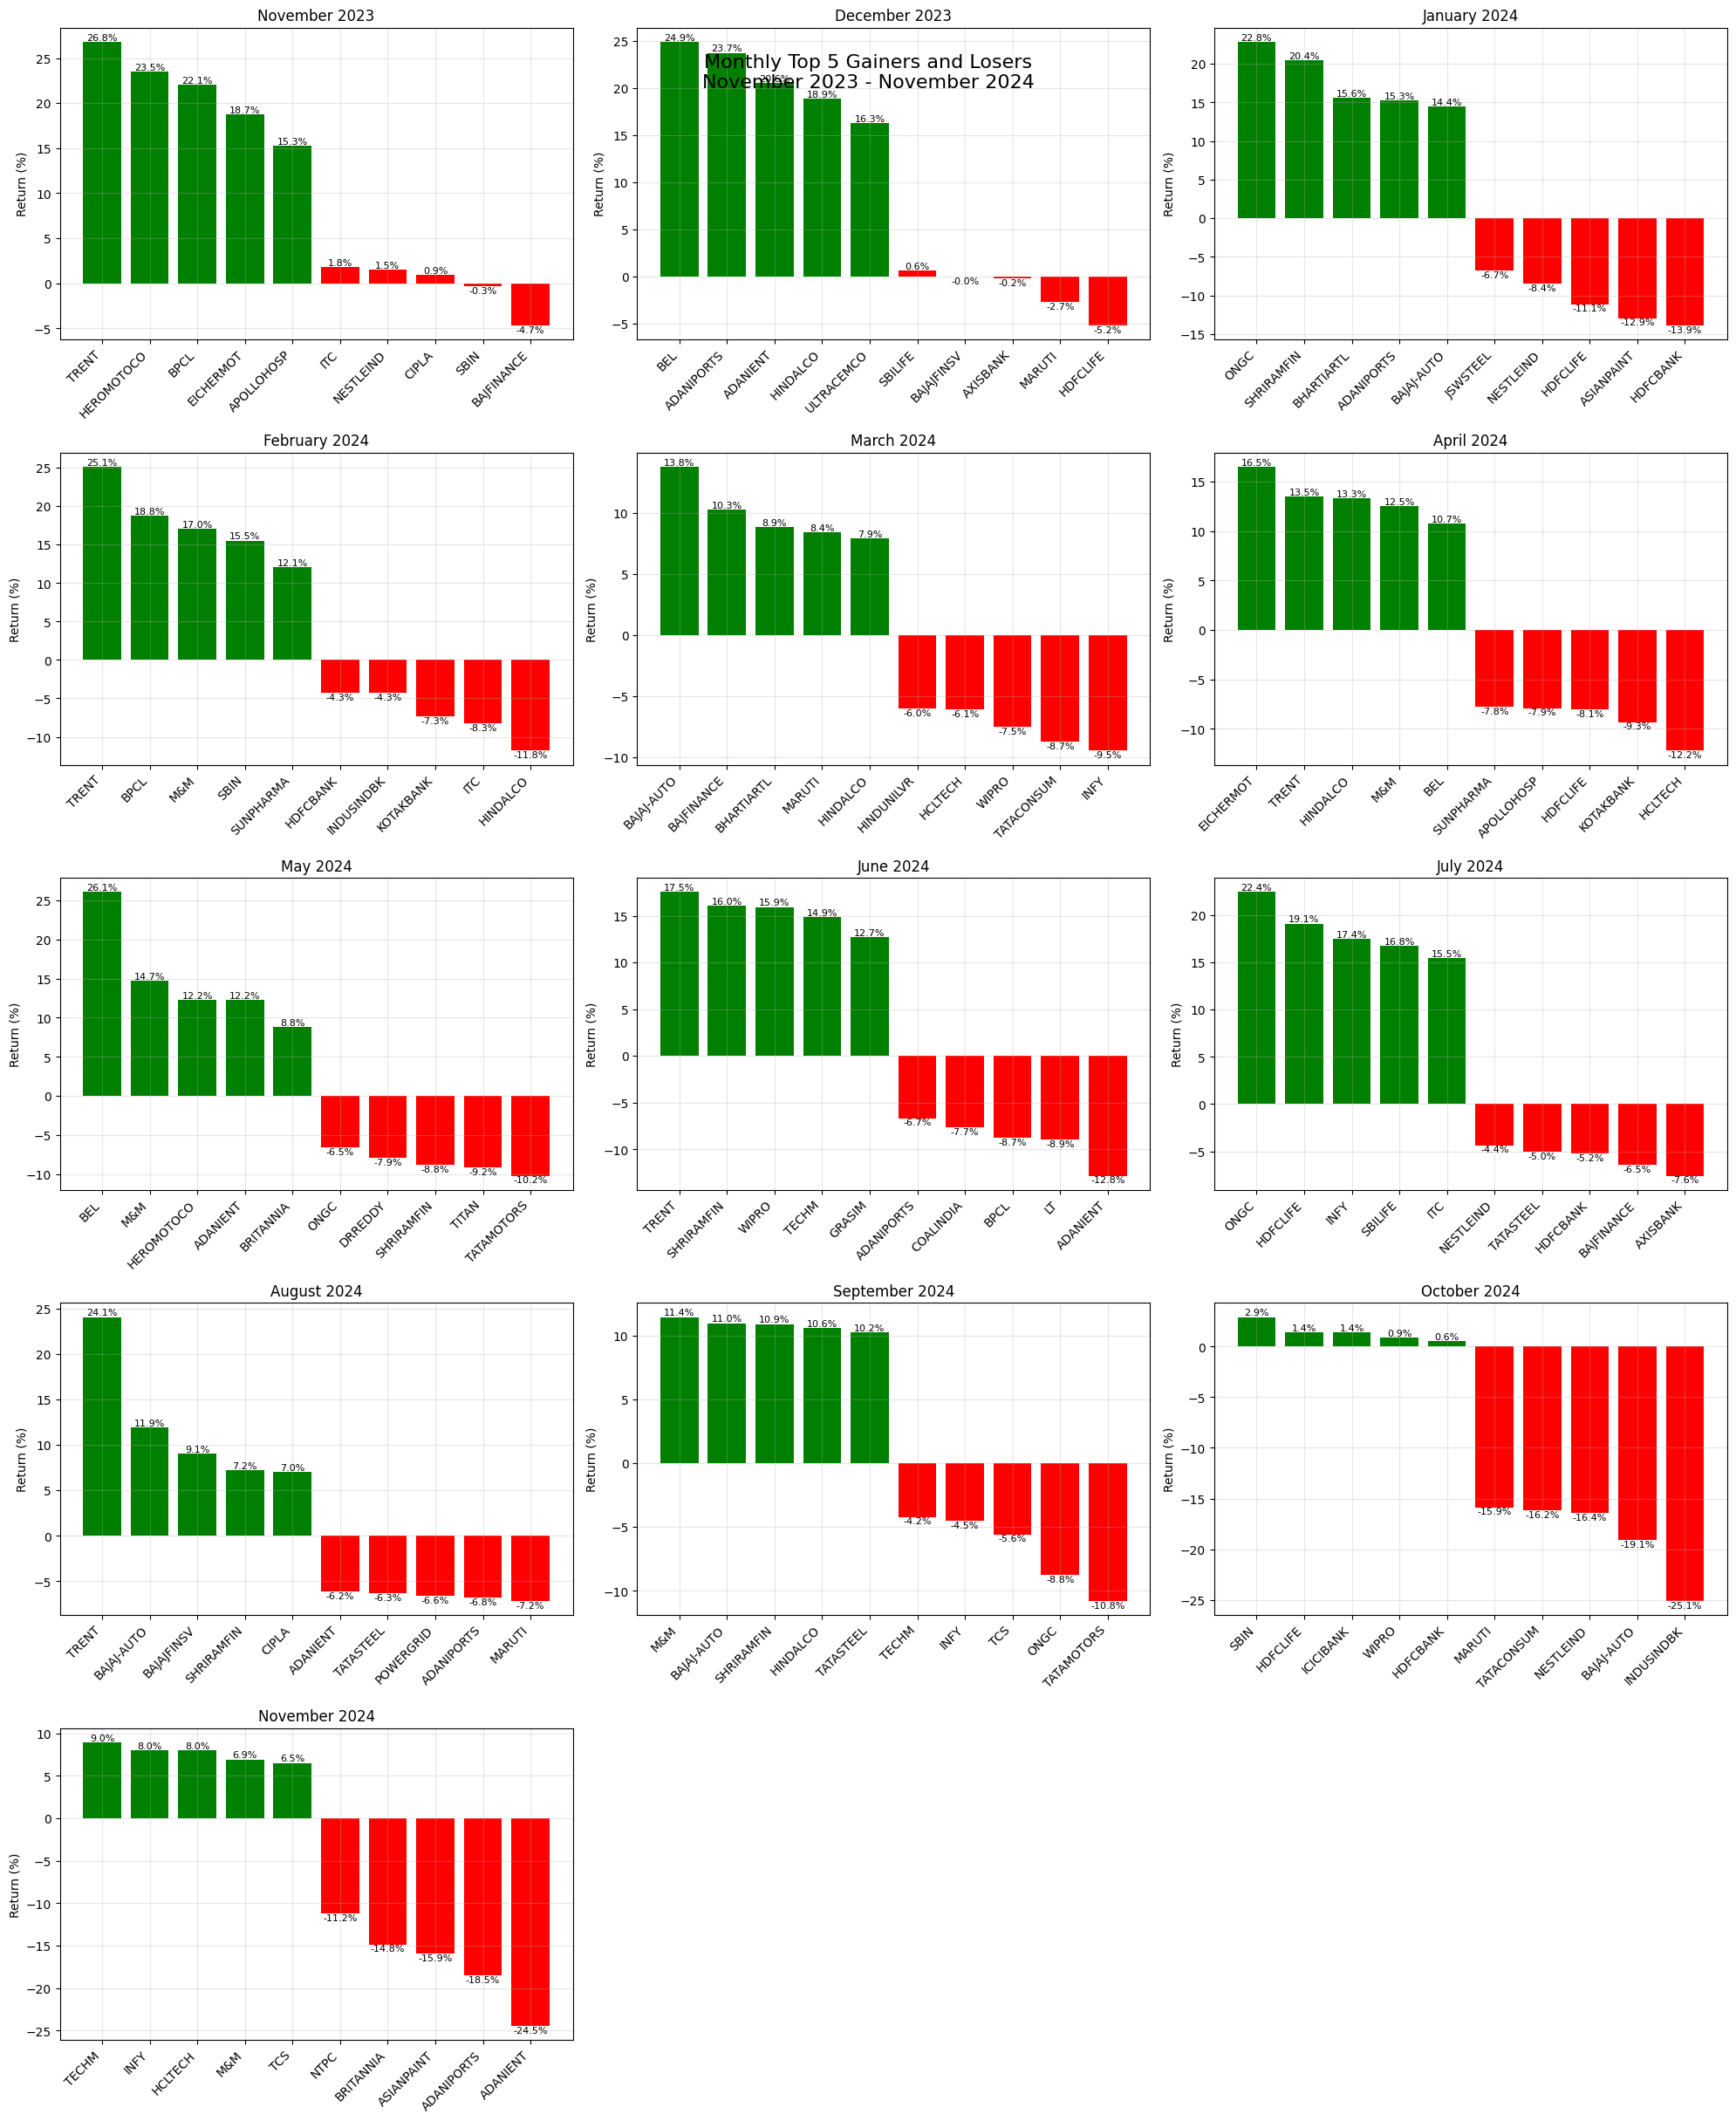

In [7]:
#Monthly Top 5 Gainers and Losers from November 2023 - November 2024
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from datetime import datetime
import calendar

def analyze_monthly_performance(input_directory, output_directory):
    output_path = Path(output_directory)
    output_path.mkdir(parents=True, exist_ok=True)

    start_date = datetime(2023, 11, 1)
    end_date = datetime(2024, 11, 30)
    
    print(f"Analyzing period: {start_date.strftime('%B %Y')} - {end_date.strftime('%B %Y')}")

    monthly_data = {}

    for file in glob.glob(str(Path(input_directory) / "*.csv")):
        try:
            df = pd.read_csv(file)
            ticker = df['Ticker'].iloc[0]

            df['date'] = pd.to_datetime(df['date'])
            df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
            
            if len(df) < 2: 
                continue

            df['month'] = df['date'].dt.to_period('M')
            monthly_prices = df.groupby('month')['close'].agg(['first', 'last'])
            monthly_returns = (monthly_prices['last'] - monthly_prices['first']) / monthly_prices['first']

            for month, ret in monthly_returns.items():
                if month not in monthly_data:
                    monthly_data[month] = []
                monthly_data[month].append({
                    'Ticker': ticker,
                    'Monthly_Return': ret
                })
            
            print(f"Processed {ticker}")
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    num_months = len(monthly_data)
    rows = (num_months + 2) // 3  
    
    fig = plt.figure(figsize=(20, 5*rows))
    fig.suptitle('Monthly Top 5 Gainers and Losers\nNovember 2023 - November 2024', 
                 fontsize=16, y=0.95)

    monthly_summary = []

    for idx, (month, data) in enumerate(sorted(monthly_data.items())):
        month_df = pd.DataFrame(data)
        month_df = month_df.sort_values('Monthly_Return', ascending=False)

        gainers = month_df.head(5)
        losers = month_df.tail(5)

        for rank, (_, row) in enumerate(gainers.iterrows(), 1):
            monthly_summary.append({
                'Month': month.strftime('%Y-%m'),
                'Type': 'Gainer',
                'Rank': rank,
                'Ticker': row['Ticker'],
                'Return': row['Monthly_Return']
            })
        
        for rank, (_, row) in enumerate(losers.iterrows(), 1):
            monthly_summary.append({
                'Month': month.strftime('%Y-%m'),
                'Type': 'Loser',
                'Rank': rank,
                'Ticker': row['Ticker'],
                'Return': row['Monthly_Return']
            })

        ax = plt.subplot(rows, 3, idx + 1)

        plot_data = pd.concat([gainers, losers])
        colors = ['green']*5 + ['red']*5

        bars = ax.bar(range(len(plot_data)), plot_data['Monthly_Return'] * 100, color=colors)

        ax.set_title(month.strftime('%B %Y'))
        ax.set_xticks(range(len(plot_data)))
        ax.set_xticklabels(plot_data['Ticker'], rotation=45, ha='right')
        ax.set_ylabel('Return (%)')
        ax.grid(True, alpha=0.3)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%',
                   ha='center', va='bottom' if height > 0 else 'top',
                   fontsize=8)
    
    plt.tight_layout()

    plt.savefig(output_path / 'monthly_performance_dashboard.png', 
                dpi=300, bbox_inches='tight')
    print("\nDashboard saved as 'monthly_performance_dashboard.png'")

    summary_df = pd.DataFrame(monthly_summary)
    summary_df.to_csv(output_path / 'monthly_performance_summary.csv', index=False)
    print("Monthly summary saved as 'monthly_performance_summary.csv'")

    with open(output_path / 'monthly_performance_analysis.txt', 'w') as f:
        f.write("Monthly Performance Analysis\n")
        f.write(f"Period: {start_date.strftime('%B %Y')} - {end_date.strftime('%B %Y')}\n\n")
        
        for month in sorted(monthly_data.keys()):
            f.write(f"\n{month.strftime('%B %Y')}\n")
            f.write("=" * 50 + "\n")
            
            month_df = pd.DataFrame(monthly_data[month])
            month_df = month_df.sort_values('Monthly_Return', ascending=False)
            
            f.write("\nTop 5 Gainers:\n")
            for _, row in month_df.head().iterrows():
                f.write(f"{row['Ticker']}: {row['Monthly_Return']:.2%}\n")
            
            f.write("\nTop 5 Losers:\n")
            for _, row in month_df.tail().iterrows():
                f.write(f"{row['Ticker']}: {row['Monthly_Return']:.2%}\n")
            
            f.write("\nMonthly Statistics:\n")
            f.write(f"Average Return: {month_df['Monthly_Return'].mean():.2%}\n")
            f.write(f"Median Return: {month_df['Monthly_Return'].median():.2%}\n")
            f.write(f"Standard Deviation: {month_df['Monthly_Return'].std():.2%}\n")
            
            f.write("-" * 50 + "\n")
    
    print("Detailed analysis saved as 'monthly_performance_analysis.txt'")
    
    return summary_df

input_directory = r"D:\Stock Project\split_by_ticker"
output_directory = r"D:\Stock Project\monthly_performance"

monthly_results = analyze_monthly_performance(input_directory, output_directory)


In [3]:
#Import csv files and store it in a mysql database
import pymysql
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import glob

def create_mysql_connection():
    try:
        connection = pymysql.connect(
            host="localhost",
            user="gokuld1",
            password="guvi",
            database="stock_analysis",
            charset='utf8mb4',
            ssl={'fake_flag_to_enable_tls': True},
            ssl_verify_cert=False
        )
        return connection
    except pymysql.Error as err:
        print(f"Error connecting to MySQL: {err}")
        return None

def prepare_correlation_data(df):
    melted_df = df.reset_index()
    melted_df = pd.melt(melted_df, 
                        id_vars=melted_df.columns[0], 
                        var_name='Stock_B', 
                        value_name='Correlation')
    melted_df.columns = ['Stock_A', 'Stock_B', 'Correlation']
    return melted_df

def check_table_contents(connection):
    cursor = connection.cursor()
    
    tables = [
        'volatility_analysis',
        'correlation_analysis',
        'sector_performance',
        'monthly_performance',
        'cumulative_returns_daily'
    ]
    
    print(f"\nChecking table contents at 2024-12-12 16:03:17")
    print("-" * 50)
    
    for table in tables:
        try:
            cursor.execute(f"SELECT COUNT(*) FROM {table}")
            count = cursor.fetchone()[0]
            print(f"Table {table}: {count} records")
            
            cursor.execute(f"SELECT * FROM {table} LIMIT 3")
            sample_data = cursor.fetchall()
            if sample_data:
                print(f"Sample data from {table}:")
                for row in sample_data:
                    print(row)
                print()
                
        except pymysql.Error as err:
            print(f"Error checking table {table}: {err}")
    
    cursor.close()

def create_tables(connection):
    cursor = connection.cursor()
    
    try:
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS cumulative_returns_daily (
                Trading_Date DATE,
                Ticker VARCHAR(20),
                Close_Price FLOAT,
                Daily_Return FLOAT,
                Cumulative_Return FLOAT,
                PRIMARY KEY (Trading_Date, Ticker)
            )
        """)
        
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS volatility_analysis (
                Ticker VARCHAR(20),
                Daily_StdDev FLOAT,
                Annualized_Volatility FLOAT,
                Risk_Category VARCHAR(20),
                PRIMARY KEY (Ticker)
            )
        """)
        
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS correlation_analysis (
                Stock_A VARCHAR(20),
                Stock_B VARCHAR(20),
                Correlation DOUBLE,
                PRIMARY KEY (Stock_A, Stock_B)
            )
        """)
        
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS sector_performance (
                Sector VARCHAR(50),
                Average_Return FLOAT,
                Number_of_Stocks INT,
                Performance_Ranking INT,
                PRIMARY KEY (Sector)
            )
        """)
        
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS monthly_performance (
                Month_Date DATE,
                Category VARCHAR(20),
                Ranking INT,
                Ticker VARCHAR(20),
                Monthly_Return FLOAT,
                PRIMARY KEY (Month_Date, Category, Ranking)
            )
        """)
        
        connection.commit()
        print("All tables created successfully")
        
    except pymysql.Error as err:
        print(f"Error creating tables: {err}")
        connection.rollback()
    finally:
        cursor.close()

def import_csv_to_mysql(connection):
    cursor = connection.cursor()
    
    folder_mappings = {
        'correlation_analysis': ('correlation_analysis', 'correlation_matrix.csv'),
        'monthly_performance': ('monthly_performance', 'monthly_performance_summary.csv'),
        'sector_analysis': ('sector_performance', 'sector_performance.csv'),
        'volatility_analysis': ('volatility_analysis', 'volatility_analysis.csv')
    }
    
    base_path = Path('D:/Stock Project')
    print(f"\nStarting CSV import at 2024-12-12 16:03:17")
    print("-" * 50)

    split_by_ticker_path = base_path / "split_by_ticker"
    if split_by_ticker_path.exists():
        print("Processing daily returns data...")
        for csv_file in split_by_ticker_path.glob("*.csv"):
            try:
                df = pd.read_csv(csv_file)
                df['date'] = pd.to_datetime(df['date'])

                mask = (df['date'] >= '2023-11-01') & (df['date'] <= '2024-11-30')
                df = df[mask]
                
                if len(df) > 0:
                    df['daily_return'] = df['close'].pct_change()
                    df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1

                    values = []
                    for _, row in df.iterrows():
                        values.append((
                            row['date'].strftime('%Y-%m-%d'),
                            row['Ticker'],
                            row['close'],
                            row['daily_return'] if not pd.isna(row['daily_return']) else 0,
                            row['cumulative_return'] if not pd.isna(row['cumulative_return']) else 0
                        ))
                    
                    insert_query = """
                        INSERT INTO cumulative_returns_daily 
                        (Trading_Date, Ticker, Close_Price, Daily_Return, Cumulative_Return)
                        VALUES (%s, %s, %s, %s, %s)
                        ON DUPLICATE KEY UPDATE
                        Close_Price = VALUES(Close_Price),
                        Daily_Return = VALUES(Daily_Return),
                        Cumulative_Return = VALUES(Cumulative_Return)
                    """
                    cursor.executemany(insert_query, values)
                    connection.commit()
                    print(f"Processed daily returns for {df['Ticker'].iloc[0]}")
            
            except Exception as e:
                print(f"Error processing {csv_file.name}: {e}")
                connection.rollback()

    for folder_name, (table_name, csv_name) in folder_mappings.items():
        try:
            csv_path = base_path / folder_name / csv_name
            print(f"Processing {csv_path}")
            
            if not csv_path.exists():
                print(f"Warning: File not found - {csv_path}")
                continue
            
            df = pd.read_csv(csv_path)
            
            if table_name == 'correlation_analysis':
                df = pd.read_csv(csv_path, index_col=0)
                df = prepare_correlation_data(df)
            
            elif table_name == 'monthly_performance':
                df['Month_Date'] = pd.to_datetime(df['Month']).dt.strftime('%Y-%m-%d')
                df = df.rename(columns={
                    'Return': 'Monthly_Return',
                    'Rank': 'Ranking',
                    'Type': 'Category'
                }).drop('Month', axis=1)
            
            elif table_name == 'sector_performance':
                df = df.rename(columns={
                    'Rank': 'Performance_Ranking'
                })
                df = df.drop_duplicates(subset=['Sector'], keep='first')
            
            elif table_name == 'volatility_analysis':
                df = pd.read_csv(csv_path)
                df['Risk_Category'] = pd.qcut(df['Daily_StdDev'], 
                                           q=3, 
                                           labels=['Low', 'Medium', 'High'])
                df = df[['Ticker', 'Daily_StdDev', 'Annualized_Volatility', 'Risk_Category']]
            
            columns = ', '.join(f"`{col}`" for col in df.columns)
            placeholders = ', '.join(['%s'] * len(df.columns))
            insert_query = f"INSERT INTO {table_name} ({columns}) VALUES ({placeholders})"
            
            values = [tuple(row) for row in df.values]
            cursor.executemany(insert_query, values)
            connection.commit()
            
            print(f"Successfully imported {len(values)} records into {table_name}")
            
        except Exception as e:
            print(f"Error importing from {folder_name}: {e}")
            print(f"DataFrame columns: {df.columns.tolist()}")
            connection.rollback()
    
    cursor.close()

def main():
    print(f"Starting database operations at: 2024-12-12 16:03:17")
    
    connection = create_mysql_connection()
    
    if connection:
        try:
            create_tables(connection)
            import_csv_to_mysql(connection)
            check_table_contents(connection)
            
        finally:
            connection.close()
            print("\nMySQL connection closed")
            print(f"Operations completed at: 2024-12-12 16:03:17")

if __name__ == "__main__":
    main()


Starting database operations at: 2024-12-12 16:03:17
All tables created successfully

Starting CSV import at 2024-12-12 16:03:17
--------------------------------------------------
Processing daily returns data...
Processed daily returns for ADANIENT
Processed daily returns for ADANIPORTS
Processed daily returns for APOLLOHOSP
Processed daily returns for ASIANPAINT
Processed daily returns for AXISBANK
Processed daily returns for BAJAJ-AUTO
Processed daily returns for BAJAJFINSV
Processed daily returns for BAJFINANCE
Processed daily returns for BEL
Processed daily returns for BHARTIARTL
Processed daily returns for BPCL
Processed daily returns for BRITANNIA
Processed daily returns for CIPLA
Processed daily returns for COALINDIA
Processed daily returns for DRREDDY
Processed daily returns for EICHERMOT
Processed daily returns for GRASIM
Processed daily returns for HCLTECH
Processed daily returns for HDFCBANK
Processed daily returns for HDFCLIFE
Processed daily returns for HEROMOTOCO
Process